<a href="https://colab.research.google.com/github/Ahmdridwan28/Ulangan-Tengah-Semester/blob/main/A_Ridwan_2125270008_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

Nomor 1
A.memuat gambar grayscale


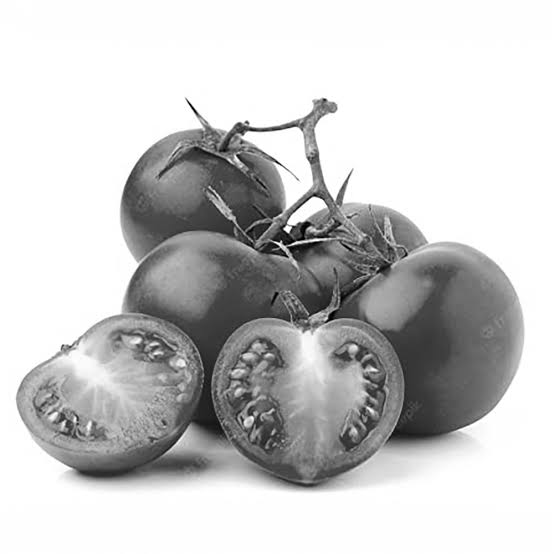

In [3]:
#memanggil gambar di google drive dan merubah ke grayscale
Tomat = cv2.imread('/content/drive/MyDrive/Foto/Tomat.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(Tomat)

B.a. Histogram Equalization


In [4]:
# Hitung histogram
equalized = cv2.equalizeHist(Tomat)
ori_hist = cv2.calcHist([Tomat], [0], None, [256], [0, 256])
equa_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])


  b.Histogram gambar sebelum dan sesudah

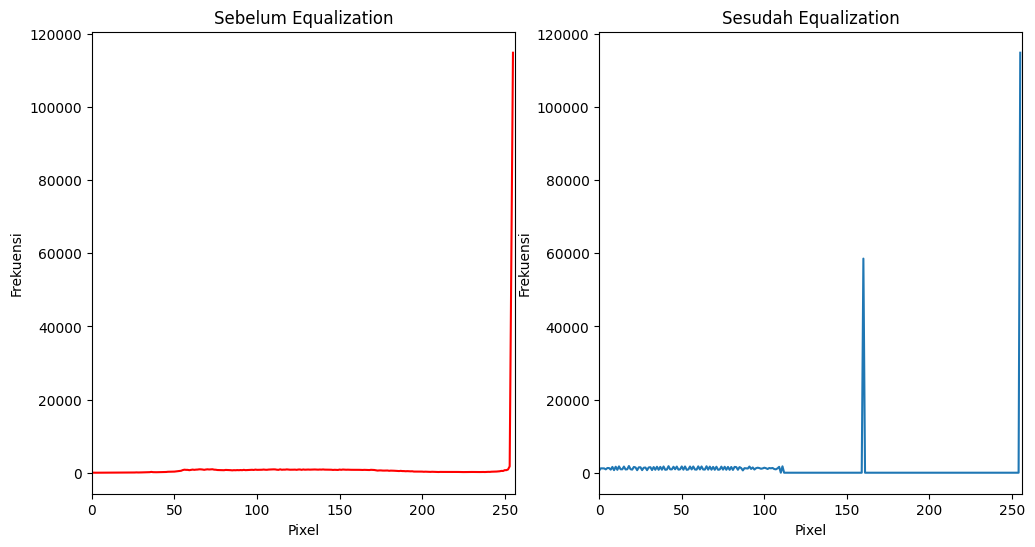

In [5]:
#size histogram dan gambar
plt.figure(figsize=(12, 6))

#sebelum
plt.subplot(1, 2, 1)
plt.title('Sebelum Equalization')
plt.xlabel('Pixel')
plt.ylabel('Frekuensi')
plt.plot(ori_hist, color='red')
plt.xlim([0, 256])

#setelah
plt.subplot(1, 2, 2)
plt.title('Sesudah Equalization')
plt.xlabel('Pixel')
plt.ylabel('Frekuensi')
plt.plot(equa_hist)
plt.xlim([0, 256])

plt.show()

c.plot gambar sebelum dan sesudah


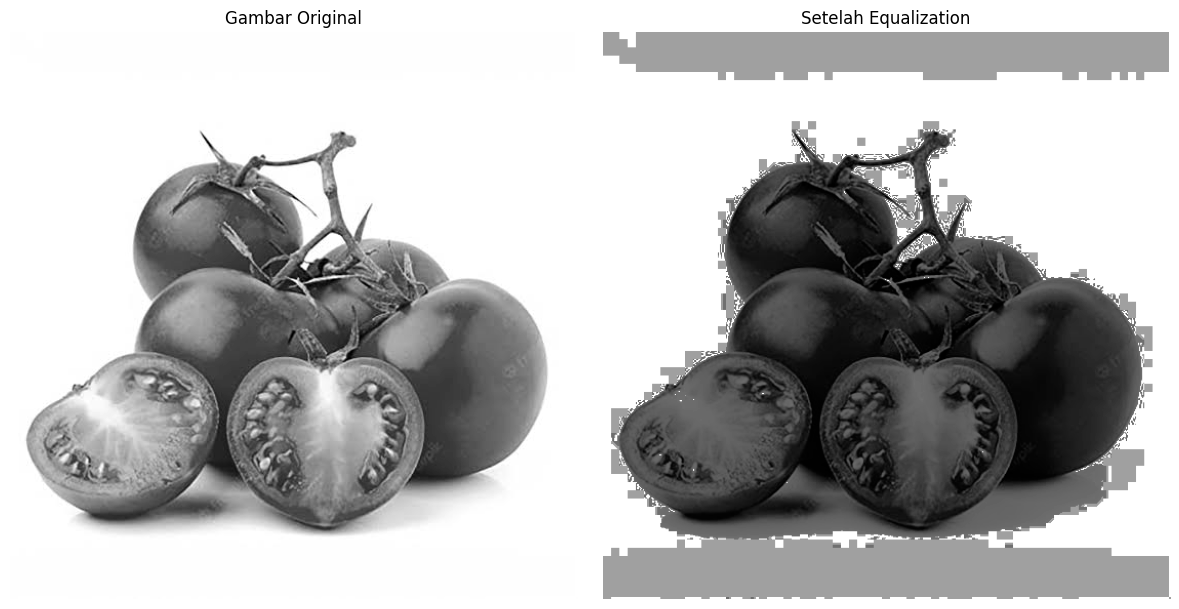

In [6]:
#gambar sebelum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Gambar Original')
plt.imshow(Tomat,  cmap = 'gray')
plt.axis('off')

#gambar sesudah
plt.subplot(1, 2, 2)
plt.title('Setelah Equalization')
plt.imshow(equalized, cmap = 'gray')
plt.axis('off')

plt.tight_layout()
plt.show()

C.Filtering di Domain frekuensi Menggunakan Gaussian filtering

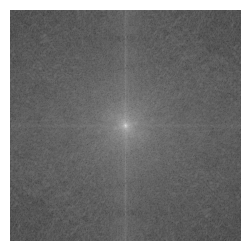

In [7]:
# a.image yang dirubah ke equalized domain frekuensi
Frekuensi = np.fft.fft2(equalized)
Fshift = np.fft.fftshift(Frekuensi)

#Menampilkan gambar
plt.figure(figsize=(3,3))
plt.imshow(np.log1p(np.abs(Fshift)), cmap = 'gray')
plt.axis('off')
plt.show()

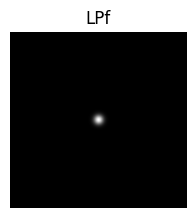

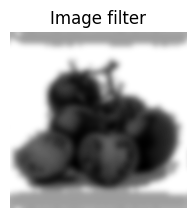

In [8]:
#b.Hasil gambar Gaussian filtering
# Low pass filter
M,N = Frekuensi.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

#menampilkan gambar
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.title('LPf')
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

#menampilkan gambar
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.title('Image filter')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

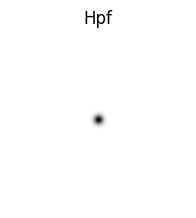

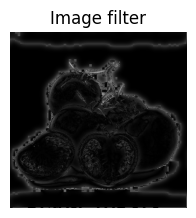

In [9]:
#High pass filtering
HPF = 1 - H

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

#menampilkan gambar
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.title('Hpf')
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

#Menampilkan gambar
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 2)
plt.title('Image filter')
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

2.Lakukan pengolahan citra digital menggunakan Google collab.

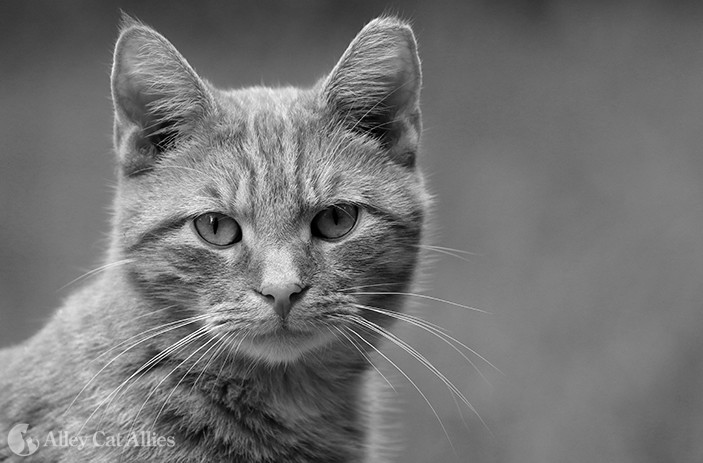

In [10]:
#A.Membuat gambar gratscale
Gambar2 = cv2.imread('/content/drive/MyDrive/Foto/Oyen_Cat.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(Gambar2)

Perbedaan nya ada ketika kernel nya nilai nya naik dari 3 kernel menjadi 5 kernel akan berubah contras nya dimana semakin terang contras dan kernel di 7 semakin terang benerang contras

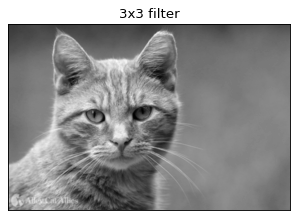

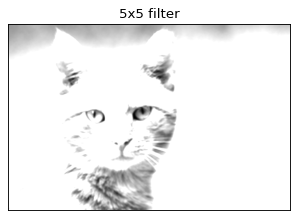

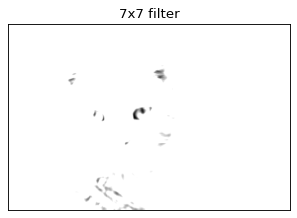

In [11]:
#Spatial filtering
#B.Averaging filters
kernel_3 = np.ones((3,3),np.float32)/9
kernel_5 = np.ones((5,5),np.float32)/9
kernel_7 = np.ones((7,7),np.float32)/9

#convoles image
filtered_3 = cv2.filter2D(Gambar2,-1,kernel_3)
filtered_5 = cv2.filter2D(Gambar2,-1,kernel_5)
filtered_7 = cv2.filter2D(Gambar2,-1,kernel_7)

#Perbandingan hasil
#3x3
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.imshow(filtered_3, cmap='gray')
plt.title('3x3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

#5x5
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(122)
plt.imshow(filtered_5, cmap='gray')
plt.title('5x5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

#7x7
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(122)
plt.imshow(filtered_7, cmap='gray')
plt.title('7x7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


perbandingan nya dari kernel 3,4,7 ketika angka dirubah lebih besar maka contras gambar akan naik lebih terang